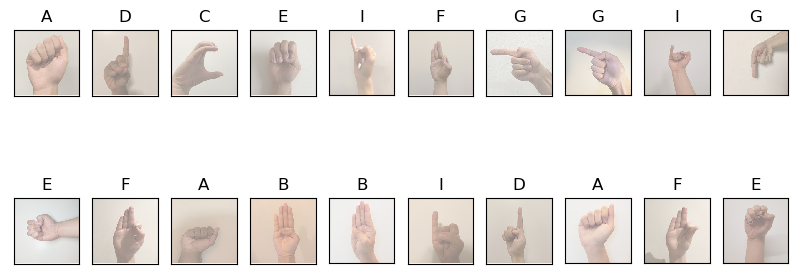

In [3]:
import torch    
import torchvision    
import numpy as np  
import matplotlib.pyplot as plt  
from torchvision import datasets, transforms    
  
# Define your transformations    
transform = transforms.Compose([  
    transforms.Resize([224, 224]),    # resize images to 224 x 224    
    transforms.ToTensor(),           # convert to tensor    
])  
  
# Use ImageFolder    
dataset = datasets.ImageFolder(root='/Users/aordorica/Documents/UofT/MIE 1517/A2/Lab_3b_Gesture_Dataset', transform=transform)    
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)    
  
# Function to convert image from tensor to numpy for visualization    
def imshow(img):    
    img = img / 2 + 0.5     # unnormalize if normalization is applied in transformation    
    npimg = img.numpy()    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # rearrange dimensions from (C,H,W) to (H,W,C)    
  
def get_sample_from_class(class_id, dataloader):    
    while True:    
        images, labels = next(iter(dataloader))    
        for i in range(len(images)):    
            if labels[i] == class_id:    
                return images[i], labels[i]    
  
# Get class names    
class_names = dataset.classes # get the class names    
  
# Plotting the images with labels  
def plot_images(images, labels):  
    fig = plt.figure(figsize=(10, 4))  
    for i in np.arange(20):  # Adjust this value according to the number of images in a batch    
        ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])  
        imshow(images[i])    
        ax.set_title(class_names[labels[i]])   
  
# Display images from a batch  
images, labels = next(iter(dataloader))    
plot_images(images, labels)  
  



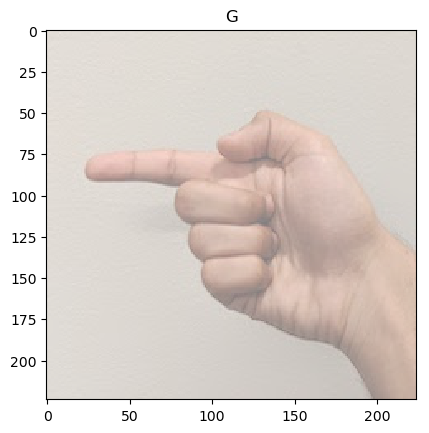

In [4]:
# Get a sample from a specific class and display it  
class_id = class_names.index('G')    
sample_image, sample_label = get_sample_from_class(class_id, dataloader)    
imshow(sample_image)    
plt.title(class_names[sample_label])    
plt.show()  